In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image

Image(filename = '/Users/manmanzhang/Downloads/softmax.png')

In [57]:
def tanh(x): #双曲正切
    return np.tanh(x)


## 把非常大的负值变成接近0把非常大的正值变成接近1
## 原理是概率空间的归一化

In [58]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## 柔性最大值传输函数

## 它可以让0加进指数后变成非0，虽然也很小，但仍然有可能取到，只是取到的概率小。而2加入指数后，后指数级增长，比1增长的快，所以使得2的概率变得比2/3大，符合要求。

In [59]:
def softmax(x): 
    exp = np.exp(x-x.max())
    return exp/exp.sum()

## 图像理解softmax

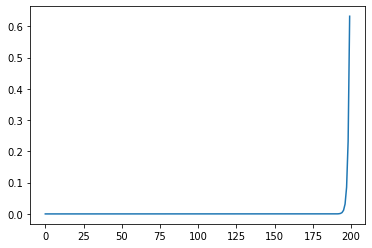

In [60]:
plt.plot(softmax(np.arange(-100,100)))

## 输入28*28图片大小为，10预测概率范围比如10和数就是10

In [61]:
dimensions = [28*28,10] #纬
dimensions

[784, 10]

In [62]:

activation = [tanh,sigmoid] #激活函数    <--列表存函数^_^完全可以用字典嘛
distribution = [
    {'b':[0,0]}
    ,{'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]}
    ,
] #分布


## 初始化b

In [63]:

def init_parameters_b(layer): #parameters->参数 ,layer->层次
    dist = distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
init_parameters_b(1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 初始化权重 w

In [64]:

def init_parameters_w(layer):#parameters->参数 ,layer->层次
    dist = distribution[layer]['w']
    print(dist)
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
init_parameters_w(1).shape

[-0.0869291381699617, 0.0869291381699617]


(784, 10)

## 整体初始化

In [65]:

def init_parameters():
    parameter = []
    for i in range(len(distribution)):
        layer_parameter = {}
        for j in distribution[i].keys():
            if j == 'b':
                layer_parameter['b'] = init_parameters_b(i)
                continue
            if j == 'w':
                init_parameters_w(i)
                layer_parameter['w'] = init_parameters_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [66]:
init_parameters_w(1).shape

[-0.0869291381699617, 0.0869291381699617]


(784, 10)

In [67]:
parameters = init_parameters()

[-0.0869291381699617, 0.0869291381699617]
[-0.0869291381699617, 0.0869291381699617]


In [68]:
def predict(img,parameters):
    l0_in = img+parameters[0]['b']
    l0_out = activation[0](l0_in)
    l1_in = np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out = activation[1](l1_in)
    return l1_out

In [69]:
#测试函数是否能够运行
example_img = np.random.rand(784) #生成一个测试的图像数值化
predict(example_img,parameters).argmax() # 最大值就是最大可能的数字，所以argmax()

3

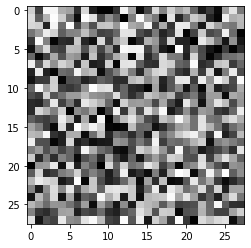

In [70]:
#图像绘出后观察
import matplotlib.pyplot as plt
im = np.reshape(example_img,(28,28))
plt.imshow(im,cmap='gray')

In [71]:
'''
import pickle
path = 'model_02.pkl'
with open(path,'rb') as f:
    parameters = pickle.load(f)
'''

"\nimport pickle\npath = 'model_02.pkl'\nwith open(path,'rb') as f:\n    parameters = pickle.load(f)\n"

In [72]:
predict(example_img,parameters).argmax()

3

## 引入图片文件

In [73]:
from path import Path

ModuleNotFoundError: No module named 'path'